# **GROUP 1 - Water Quality Model - Our First Model**

In [36]:
#Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import make_moons
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight

In [16]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Load the dataset
file_path = '/content/drive/My Drive/water_potability.csv'
data = pd.read_csv(file_path)

# Display part of the dataset
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# **1- DATA PREPROCESSING**

In [17]:
#Data Preprocessing
# Handling missing data by filling missing values with the median of their respective columns
data_filled = data.fillna(data.median())

# Split the dataset into features (X) and target (Y)
X = data_filled.drop('Potability', axis=1)
Y = data_filled['Potability']

# Check if scaling is necessary by looking at the range of feature values
X.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


# **2- DATA SPLITTING**

In [18]:
#Data Splitting

#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

#Display the shape of the result
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((2620, 9), (656, 9), (2620,), (656,))

# **3-MODEL ARCHITECTURE**

In [19]:
#Vanilla model
# Define the model architecture
model = Sequential()
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Display model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
print(np.unique(Y_train))


[0 1]


In [27]:
# Ensure Y_train is a numpy array to avoid Pandas indexing issues
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

# Compute class weights
class_weights_dict = {0: 0.8259773013871374, 1: 1.2669245647969052}
# Define the model architecture
model = Sequential()
model.add(Dense(units=128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Adding dropout to prevent overfitting
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Compute class weights (if dataset is imbalanced)
import numpy as np
from sklearn.utils import class_weight

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(Y_train), y=Y_train)

# Convert the class weights array into a dictionary
class_weights_dict = {i: class_weights[i] for i in np.unique(Y_train)}
print(class_weights_dict)

# Train the model using the correct class_weights dictionary
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping],
                    class_weight=class_weights_dict)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


{0: 0.8259773013871374, 1: 1.2669245647969052}
Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4408 - loss: 0.7165 - val_accuracy: 0.5821 - val_loss: 0.6844
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4817 - loss: 0.6993 - val_accuracy: 0.5954 - val_loss: 0.6819
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4784 - loss: 0.7008 - val_accuracy: 0.6011 - val_loss: 0.6789
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5379 - loss: 0.6877 - val_accuracy: 0.6374 - val_loss: 0.6772
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5023 - loss: 0.6918 - val_accuracy: 0.6450 - val_loss: 0.6750
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5276 - loss: 0.6899 - val_accuracy: 0.6431 - val_loss: 0.6716
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5590 - loss: 0.6721 - val_accuracy: 0.6584 - val_loss: 0.6689
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy:

In [22]:
print(class_weights_dict)


{0: 0.8259773013871374, 1: 1.2669245647969052}


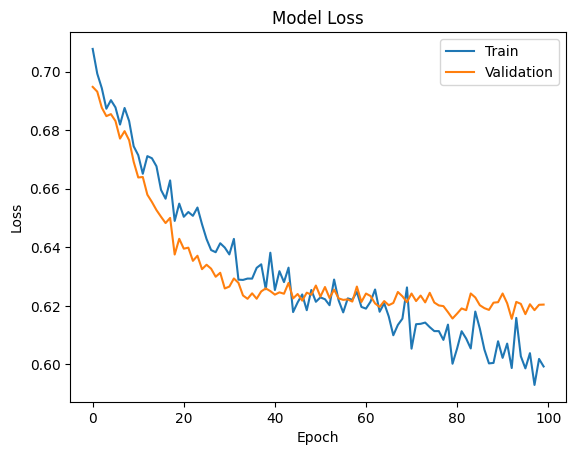

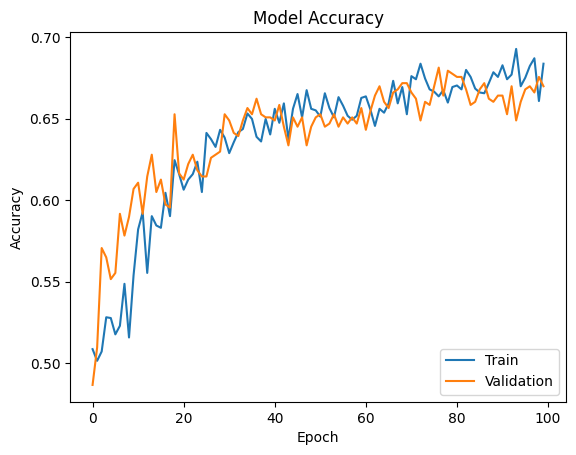

In [23]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


**L2 with Adam**

Train: 0.703, Test: 0.668


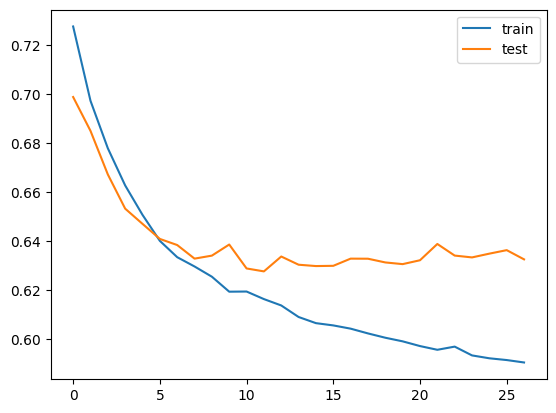

In [34]:
model_l2 = Sequential()
model_l2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model_l2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model_l2.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))

#Compile the model
model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model_l2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=4000, verbose=0, callbacks=[early_stopping])


# evaluate the model
_, train_acc = model_l2.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model_l2.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

**L2 with Dropout**

Train: 0.69, Test: 0.69


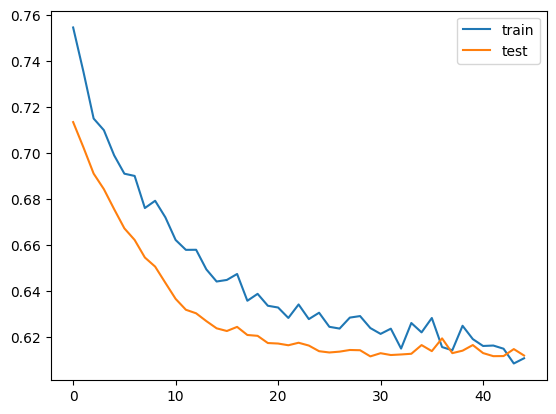

In [40]:
model_l2_dropout = Sequential()
model_l2_dropout.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model_l2_dropout.add(tf.keras.layers.Dropout(0.4))
model_l2_dropout.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model_l2_dropout.add(tf.keras.layers.Dropout(0.4))
model_l2_dropout.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.001)))

#Compile the model
model_l2_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit model
history = model_l2_dropout.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=4000, verbose=0, callbacks=[early_stopping])


# evaluate the model
_, train_acc = model_l2_dropout.evaluate(X_train, Y_train, verbose=0)
_, test_acc = model_l2_dropout.evaluate(X_test, Y_test, verbose=0)
print('Train: %.2f, Test: %.2f' % (train_acc, test_acc))


# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()